## Manifold Learning on Swiss roll

In [1]:
import pandas as pd
import seaborn as sns

from sklearn import datasets

import matplotlib.pyplot as plt

from mpl_toolkits import mplot3d

In [2]:
def generate_manifold(method, n = 1500):
    
    X, color = method(n_samples = n)
    
    print ("Shape of X : ", X.shape)
    print ("Shape of color : ", color.shape)
    print()
    print ("Sample X : \n")
    
    X = pd.DataFrame(X)
    print(X.sample(10))
    
    ax = plt.subplots(figsize=(12, 8))
    ax = plt.axes(projection ='3d')
    
    ax.scatter3D(X[0], X[1], X[2], c = color, cmap = plt.cm.Spectral);
    
    return X, color

Shape of X :  (1500, 3)
Shape of color :  (1500,)

Sample X : 

              0          1          2
341    6.768068  14.319881  11.815911
875   -2.107322   5.311716   7.838286
78    -7.337333   8.446899  -7.073764
1248   4.430915   3.786384  -3.457904
143   11.438568   8.147706   6.326569
77    -0.287499  18.168831 -10.965594
160    0.534653  19.294404   7.766872
690   -0.654150   4.876379 -10.916138
1408  -0.887176   4.875006   7.916030
781    6.335434  14.282791   0.419545


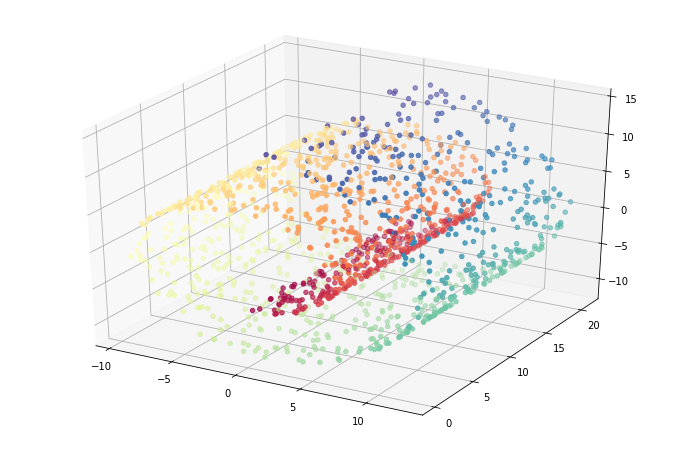

In [3]:
X, color = generate_manifold(datasets.samples_generator.make_swiss_roll)

## Manifold Learning

In [4]:
def apply_manifold_learning(X, method):
    
    X = method.fit_transform(X)
    
    print ("New shape of X : ", X.shape)
    print()
    print ("Sample X : \n")
    
    X = pd.DataFrame(X)
    print(X.sample(10))
    
    plt.subplots(figsize = (12, 10))
    plt.axis('equal');

    plt.scatter(X[0], X[1], c = color, cmap = plt.cm.Spectral)
    plt.xlabel('X[0]')
    plt.ylabel('X[1]');
    
    return method

### Apply MDS
* n_components : Number of dimensions in which to immerse the dissimilarities.
* metric : If True, perform metric MDS; otherwise, perform nonmetric MDS.
* embedding_ :Stores the position of the dataset in the embedding space.
* stress_ : The final value of the stress (sum of squared distance of the disparities and the distances for all constrained points).

https://scikit-learn.org/stable/modules/generated/sklearn.manifold.MDS.html

New shape of X :  (1500, 2)

Sample X : 

             0         1
973  -0.430418  0.520940
526   0.059202 -0.016129
1473  0.585202 -0.245923
908  -0.481750  0.398955
173   0.447335  0.062557
216  -0.113436 -0.037923
1298 -0.176654 -0.586228
292  -0.250902 -0.166781
277  -0.346987 -0.134598
1235  0.455943  0.496059


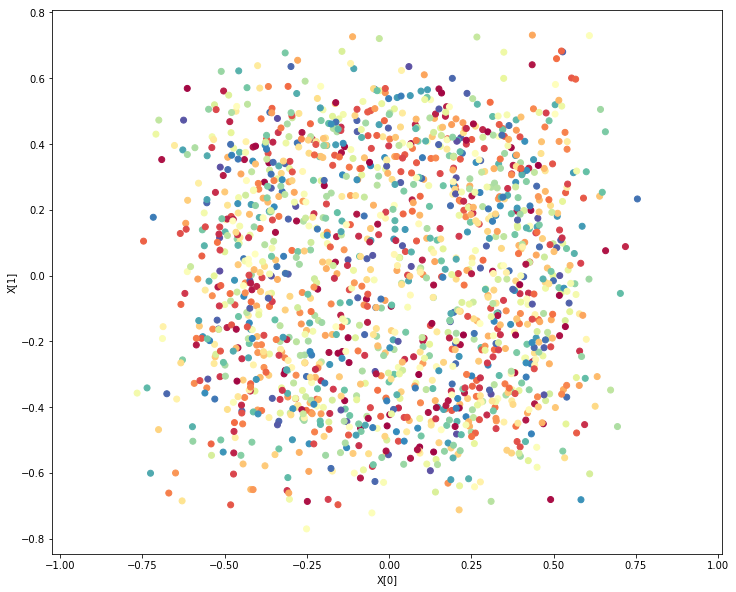

In [5]:
from sklearn.manifold import MDS

mds = apply_manifold_learning(X, MDS(n_components = 2, metric=False))

New shape of X :  (1500, 2)

Sample X : 

              0          1
736    2.574793 -13.798798
325   -4.626520  -2.226082
795   -0.555379   9.264129
1315   9.961244  -6.811879
39    10.467640  -6.444434
784  -12.337442  -4.073337
204   -3.271192  12.694135
252   12.492143  -4.136445
1169  -7.798948  -0.268790
66     2.506407  -6.359676


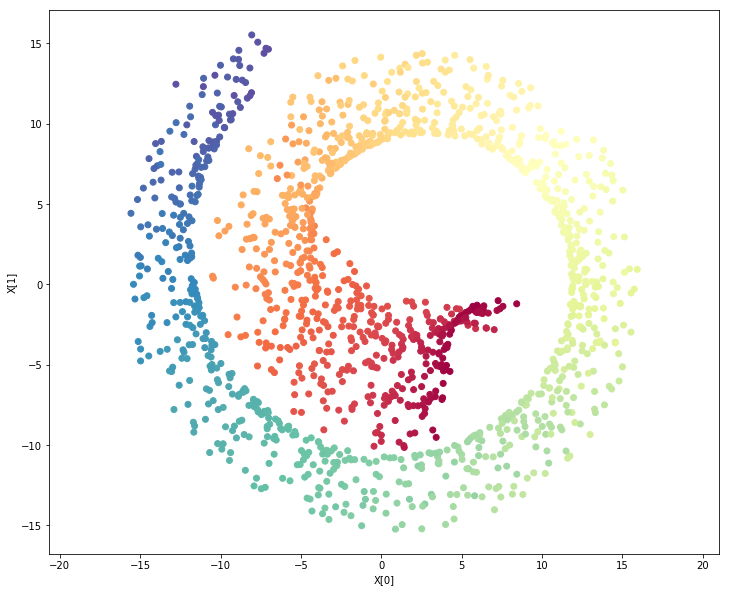

In [6]:
mds = apply_manifold_learning(X, MDS(n_components = 2, metric=True))

### Apply Spectral Embedding

* n_components : The dimension of the projected subspace. 
* random_state : A pseudo random number generator used for the initialization of the lobpcg eigenvectors.
* eigen_solver : None, ‘arpack’, ‘lobpcg’, or ‘amg’
    * The eigenvalue decomposition strategy to use.
    
* embedding_ : Spectral embedding of the training matrix.

* affinity_matrix_ : Affinity_matrix constructed from samples or precomputed.

https://scikit-learn.org/stable/modules/generated/sklearn.manifold.SpectralEmbedding.html

New shape of X :  (1500, 2)

Sample X : 

             0         1
1281  0.003347  0.000914
750  -0.000159 -0.002436
849   0.000162  0.003987
815  -0.002229  0.000715
1178  0.002141 -0.001967
1375  0.002738 -0.001202
1085  0.002688  0.003001
533   0.002684 -0.001376
98   -0.002142 -0.000551
351  -0.001624 -0.001287


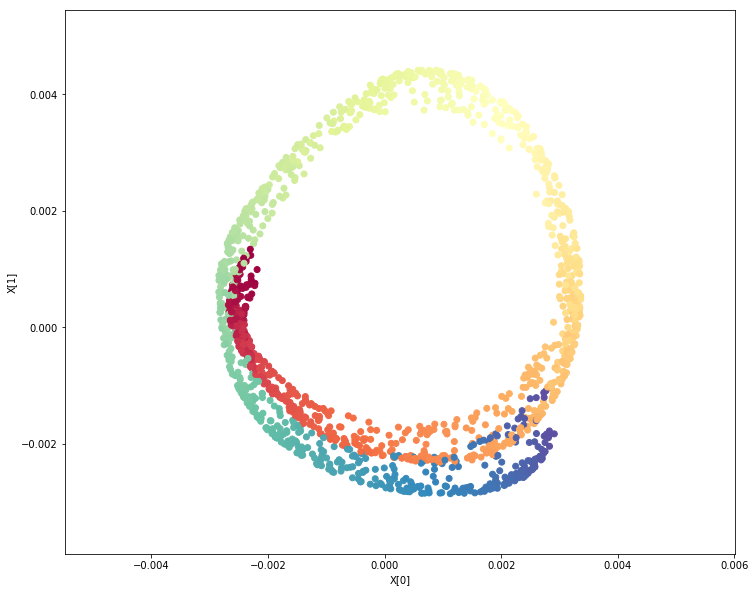

In [7]:
from sklearn.manifold import SpectralEmbedding

spectral_em = apply_manifold_learning(X, \
    SpectralEmbedding(n_components = 2, random_state = 0, eigen_solver = "arpack"))

### Apply TSNE
* n_components : Dimension of the embedded space.
* init : Initialization of embedding. Possible options are ‘random’, ‘pca’, and a numpy array of shape (n_samples, n_components). PCA initialization cannot be used with precomputed distances and is usually more globally stable than random initialization.
* random_state : If int, random_state is the seed used by the random number generator
* embedding_ : Stores the embedding vectors.
* kl_divergence_ : Kullback-Leibler divergence after optimization.

https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html

New shape of X :  (1500, 2)

Sample X : 

              0          1
249   20.435921   0.762889
1427 -11.667622  35.965954
1406  28.890354  19.751534
1275 -21.179428 -18.515406
745    1.854349 -30.791615
906   14.014801  18.895338
644   37.119686 -40.614285
1222  19.804241  27.947968
86     0.457097  43.123051
1415 -35.065739  15.850834


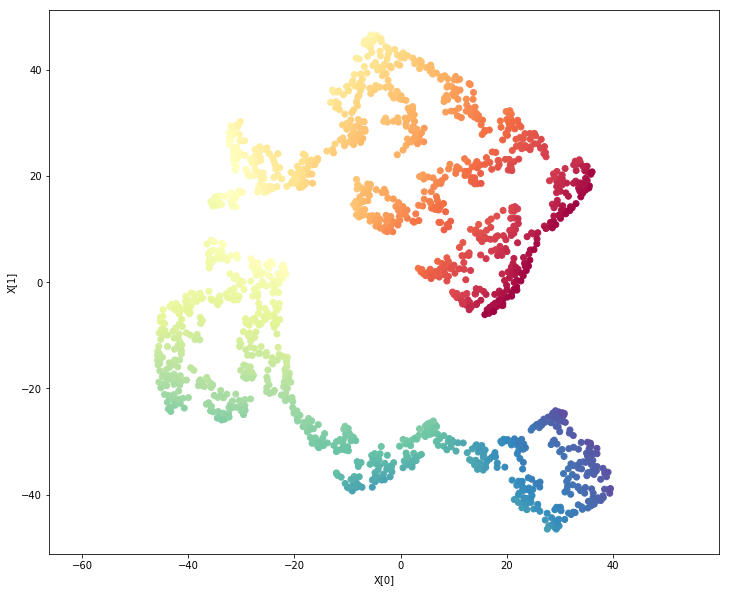

In [8]:
from sklearn.manifold import TSNE

tsne = apply_manifold_learning(X, TSNE(n_components = 2, init = 'pca', random_state = 0))

### Apply Isomap

* n_neighbors : number of neighbors to consider for each point.

* n_components : number of coordinates for the manifold
* embedding_ : Stores the embedding vectors.

* dist_matrix_ : Stores the geodesic distance matrix of training data.

https://scikit-learn.org/stable/modules/generated/sklearn.manifold.Isomap.html

New shape of X :  (1500, 2)

Sample X : 

              0          1
825  -35.347066   9.845479
1472 -32.274443   1.723562
419  -44.075486  10.420088
983   23.349142   3.034957
1127 -32.219425   7.103684
1397  18.005342   9.570614
1429  -3.755932   3.234165
776  -10.883006  -6.722494
206   33.129513   2.372706
867  -25.963806   5.831457


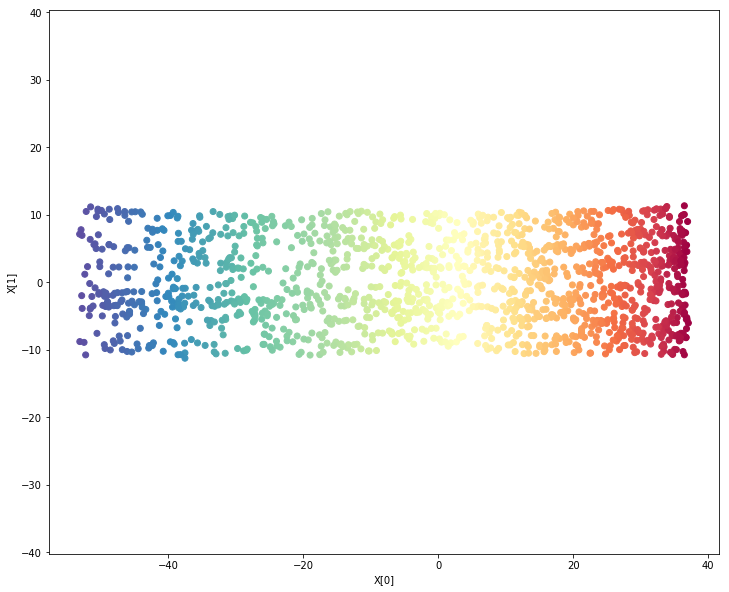

In [9]:
from sklearn.manifold import Isomap

isomap = apply_manifold_learning(X, Isomap(n_neighbors = 15, n_components = 2))

### Apply LLE
* n_neighbors :number of neighbors to consider for each point.

* n_components : number of coordinates for the manifold
* method : ‘standard’, ‘hessian’, ‘modified’ or ‘ltsa’
    * standard : use the standard locally linear embedding algorithm. 

    * hessian : use the Hessian eigenmap method. This method requires n_neighbors > n_components * (1 + (n_components + 1) / 2 

    * modified : use the modified locally linear embedding algorithm.
    * ltsa : use local tangent space alignment algorithm
* embedding_ : Stores the embedding vectors

* reconstruction_error_ : Reconstruction error associated with embedding_

https://scikit-learn.org/stable/modules/generated/sklearn.manifold.LocallyLinearEmbedding.html

New shape of X :  (1500, 2)

Sample X : 

             0         1
1204  0.023933  0.018095
1258 -0.028657  0.029593
171  -0.021955  0.004283
66   -0.034319 -0.054047
379  -0.012852  0.022954
140   0.044500  0.000279
1383  0.028128  0.013761
373   0.014142 -0.012216
901   0.031619 -0.009394
362   0.015219  0.024380


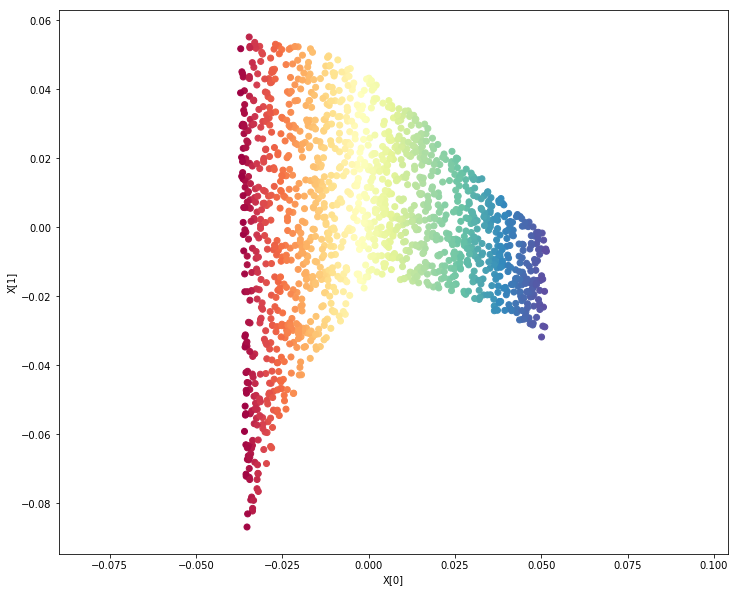

In [10]:
from sklearn.manifold import LocallyLinearEmbedding

lle = apply_manifold_learning(X, \
    LocallyLinearEmbedding(n_neighbors = 15, n_components = 2, method = 'standard'))

New shape of X :  (1500, 2)

Sample X : 

             0         1
1400 -0.013883 -0.001700
622  -0.026999  0.007822
1065 -0.018510  0.037756
1319 -0.013899 -0.031706
772   0.039203  0.006740
551   0.012324  0.010892
558  -0.031178 -0.024661
1243  0.010375 -0.022708
184  -0.034694  0.020370
839   0.031473 -0.012300


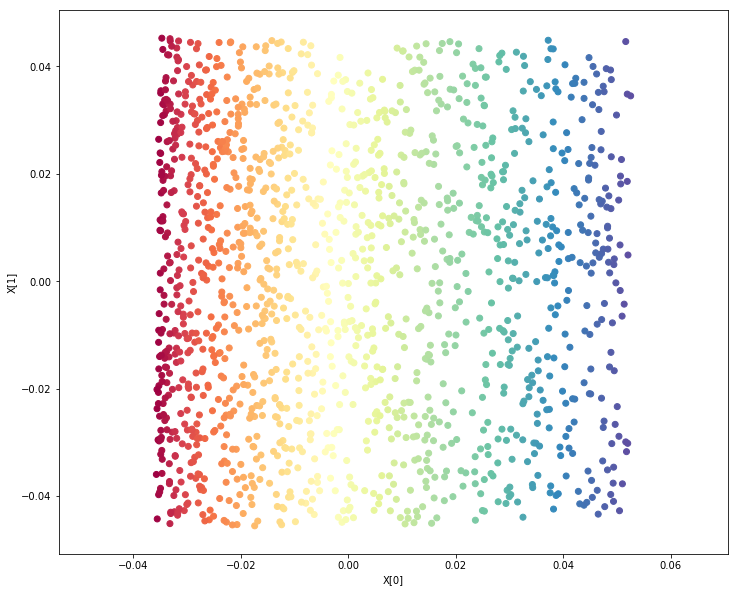

In [11]:
lle = apply_manifold_learning(X, \
    LocallyLinearEmbedding(n_neighbors = 15, n_components = 2, method = 'modified'))

### Apply HLLE

* embedding_ : Stores the embedding vectors

* reconstruction_error_ : Reconstruction error associated with embedding_

https://scikit-learn.org/stable/modules/generated/sklearn.manifold.LocallyLinearEmbedding.html

New shape of X :  (1500, 2)

Sample X : 

             0         1
583   0.037589  0.012026
704  -0.024732 -0.028132
547  -0.027955 -0.005759
1220  0.044255  0.003398
136   0.014484 -0.014363
871  -0.032111  0.004788
483  -0.020446  0.017480
233   0.015710  0.021694
820  -0.031157 -0.042599
1111 -0.001321 -0.044176


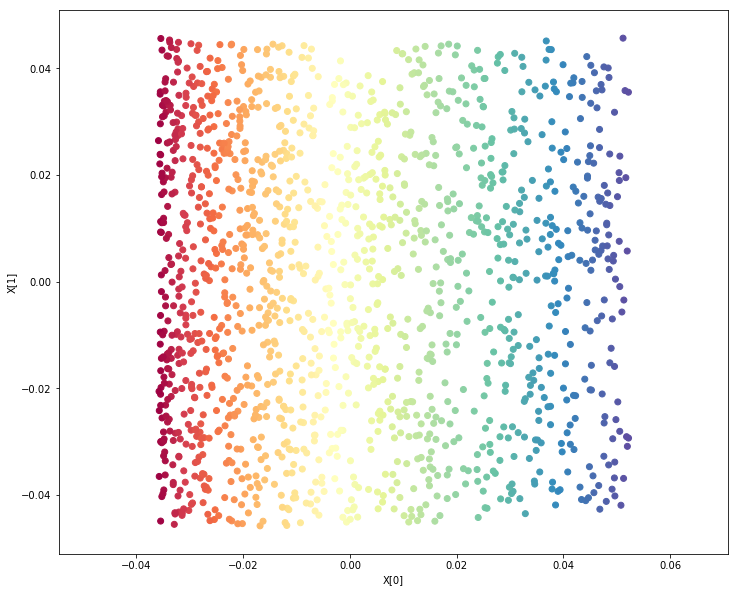

In [12]:
hlle = apply_manifold_learning(X, \
    LocallyLinearEmbedding(n_neighbors = 15, n_components = 2, method = 'hessian'))